In [3]:
import numpy as np
import sympy as sp
from sympy.utilities.lambdify import lambdify as ly
import IPython.display as ipd

sp.init_printing()

x, y, z, t, a, b, c, b, α, β, γ, δ = sp.symbols('x y z t a b c b α β γ δ')
j, k, l, m, n = sp.symbols('j k l m n', integer=True)
f, g, h = sp.symbols('f g h', cls=sp.Function)

π=sp.pi
e=sp.exp(1)
i=sp.sqrt(-1)

deco = {
    #'diff': '\\left( {o} \\right)^\\prime',
    'diff': '\\frac d {{d{a[0]}}}\\left( {o} \\right)',
    'integrate': '\\int \\left( {o} \\right) d{a[0]}',
    'evalf': '\\left. {o} \\right| \\left( {subs} \\right)',
}

def lps(objs):
    return " ".join(o if type(o) is str else sp.latex(o) for o in objs)

def lpl(objs):
    return "$" + lps(objs) + "$"

def lp(objs):
    display(ipd.Math(lps(objs)))

def px(obj, d, f, *args, **kwargs):
    result = getattr(obj, f)(*args, **kwargs)
    if d or f in deco:
        if not d:
            d = deco[f]
        display(ipd.Math(d.format(o=sp.latex(obj), a=args, **kwargs) + ' = ' + sp.latex(result)))
    else:
        lp([obj, '=', result])
    return result

def pxn(objl, objr, d, f, *args, **kwargs):
    resultr = getattr(objr, f)(*args, **kwargs)
    if d or f in deco:
        if not d:
            d = deco[f]
        display(ipd.Math(d.format(o=sp.latex(objl), a=args, **kwargs) + ' = ' + d.format(o=sp.latex(objr), a=args, **kwargs) + ' = ' + sp.latex(resultr)))
    else:
        lp([objl, '=', objr, '=', resultr])
    return resultr

In [4]:
import matplotlib.ticker as tck
import matplotlib.pyplot as plt

def multiple_formatter(denominator=2, number=np.pi, latex='\pi'):
    def gcd(a, b):
        while b:
            a, b = b, a%b
        return a
    def _multiple_formatter(x, pos):
        den = denominator
        num = np.int(np.rint(den*x/number))
        com = gcd(num,den)
        (num,den) = (int(num/com),int(den/com))
        if den==1:
            if num==0:
                return r'$0$'
            if num==1:
                return r'$%s$'%latex
            elif num==-1:
                return r'$-%s$'%latex
            else:
                return r'$%s%s$'%(num,latex)
        else:
            if num==1:
                return r'$\frac{%s}{%s}$'%(latex,den)
            elif num==-1:
                return r'$\frac{-%s}{%s}$'%(latex,den)
            else:
                return r'$\frac{%s%s}{%s}$'%(num,latex,den)
    return _multiple_formatter

class Multiple:
    def __init__(self, denominator=2, number=np.pi, latex='\pi'):
        self.denominator = denominator
        self.number = number
        self.latex = latex

    def locator(self):
        return plt.MultipleLocator(self.number / self.denominator)

    def formatter(self):
        return plt.FuncFormatter(multiple_formatter(self.denominator, self.number, self.latex))

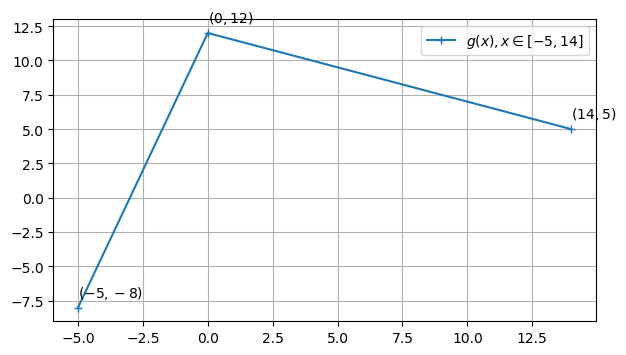

In [11]:
figure, plot = plt.subplots(figsize=(7, 4), dpi=100)
plot.grid()

#x     = np.linspace(start=-math.pi, stop=math.pi, num=300)
#y     = np.sin(x)
#sin,  = plot.plot(x, y, label='$y = sin(x)$')
#y     = np.sin(x**2)
#sin2, = plot.plot(x, y, label='$y = sin(x^2)$')

xc = [-5, 0, 14]
yc = [-8, 12, 5]

xy, = plot.plot(xc, yc, '+-', label='$g(x), x \in \\left[ -5, 14 \\right]$')

for x,y in zip(xc, yc):
    plt.annotate(f"$\\left( {x}, {y} \\right)$", (x, y), ha='left', va='bottom', xytext=(0, 5), textcoords='offset points')

plt.legend(handles=[xy], loc='best')
plt.show()

$g(x)$ is defined over $\left[ -5, 14 \right]$

It is linear from $\left( -5, -8 \right)$ to $\left( 0, 12 \right)$,  
and from $\left( 0, 12 \right)$ to $\left( 14, 5 \right)$.

$\forall x \in \left[ -5, 0 \right], g(x) = -8 + (x+5) \frac {20} 5 = 12 + 4x$  
$\forall x \in \left[ 0, 14 \right], g(x) = 12 + x \frac {-7} {14} = 12 - \frac x 2$  

First as $g(-5) = -8$, and $g$ is defined over $\left[ -5, 14 \right]$, $gg(-8)$ cannot have a value.

so,  

$gg(x) = g \circ g (x) = g(g(x))$ must be broken down in segments:  
First find the values of $x$ for $g(x) \in \left[ -5, 0 \right]$, over the first segment of $g$.  
Then find the values of $x$ for $g(x) \in \left[ 0, 12 \right]$, still over the first segment of $g$.  
Lastly find the values of $x$ over the second segment of $g$.

$g(x) = -5 \equiv 4x = -17 \equiv x = \frac {-17} 4$  
$g(x) = 0 \equiv 4x = -12 \equiv x = -3$  
$g(x) = 12 \equiv x = 0$

|&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; $x$ &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;|$g(x)$|$gg(x)$|
|:---:|:---:|:---:|
|$-5$|$-8$|$\emptyset$|
|$\frac {-17} 4 = -4 - \frac 1 4 = -4.25$|$-5$|$-8$|
|$-3$|$0$|$12$|
|$0$|$12$|$6$|
|$14$|$5$|$9.5$|


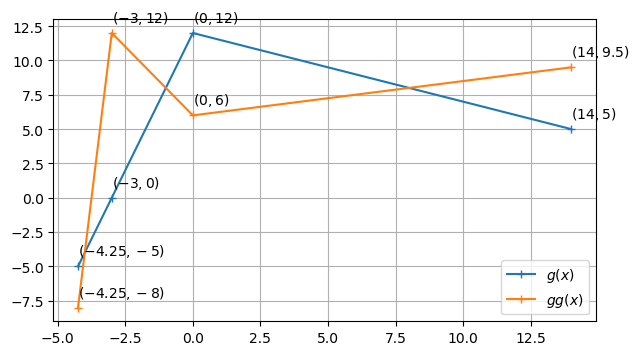

In [13]:
figure, plot = plt.subplots(figsize=(7, 4), dpi=100)
plot.grid()

#x     = np.linspace(start=-math.pi, stop=math.pi, num=300)
#y     = np.sin(x)
#sin,  = plot.plot(x, y, label='$y = sin(x)$')
#y     = np.sin(x**2)
#sin2, = plot.plot(x, y, label='$y = sin(x^2)$')

xc = [-4.25, -3, 0, 14]
gc = [-5, 0, 12, 5]
gg = [-8, 12, 6, 9.5]

gx, = plot.plot(xc, gc, '+-', label='$g(x)$')
ggx, = plot.plot(xc, gg, '+-', label='$gg(x)$')

for x,y,z in zip(xc, gc, gg):
    plt.annotate(f"$\\left( {x}, {y} \\right)$", (x, y), ha='left', va='bottom', xytext=(0, 5), textcoords='offset points')
    plt.annotate(f"$\\left( {x}, {z} \\right)$", (x, z), ha='left', va='bottom', xytext=(0, 5), textcoords='offset points')

plt.legend(handles=[gx, ggx], loc='best')
plt.show()